In [6]:
import os
import cv2
from tqdm import tqdm
from IPython.display import clear_output
print("Initial Load cell: ", end='')

fileList = os.listdir("TestSet")

fileList = [f"TestSet/{i}" for i in fileList]
print(f"{len(fileList)} images loaded from folder")

imageArray = [cv2.imread(i) for i in fileList]

print(''.join(['-' for i in range(50)]))


Initial Load cell: 88 images loaded from folder
--------------------------------------------------


Reliable Lane markings cell: 
--------------------------------------------------


100%|██████████| 88/88 [00:00<00:00, 608.52it/s]


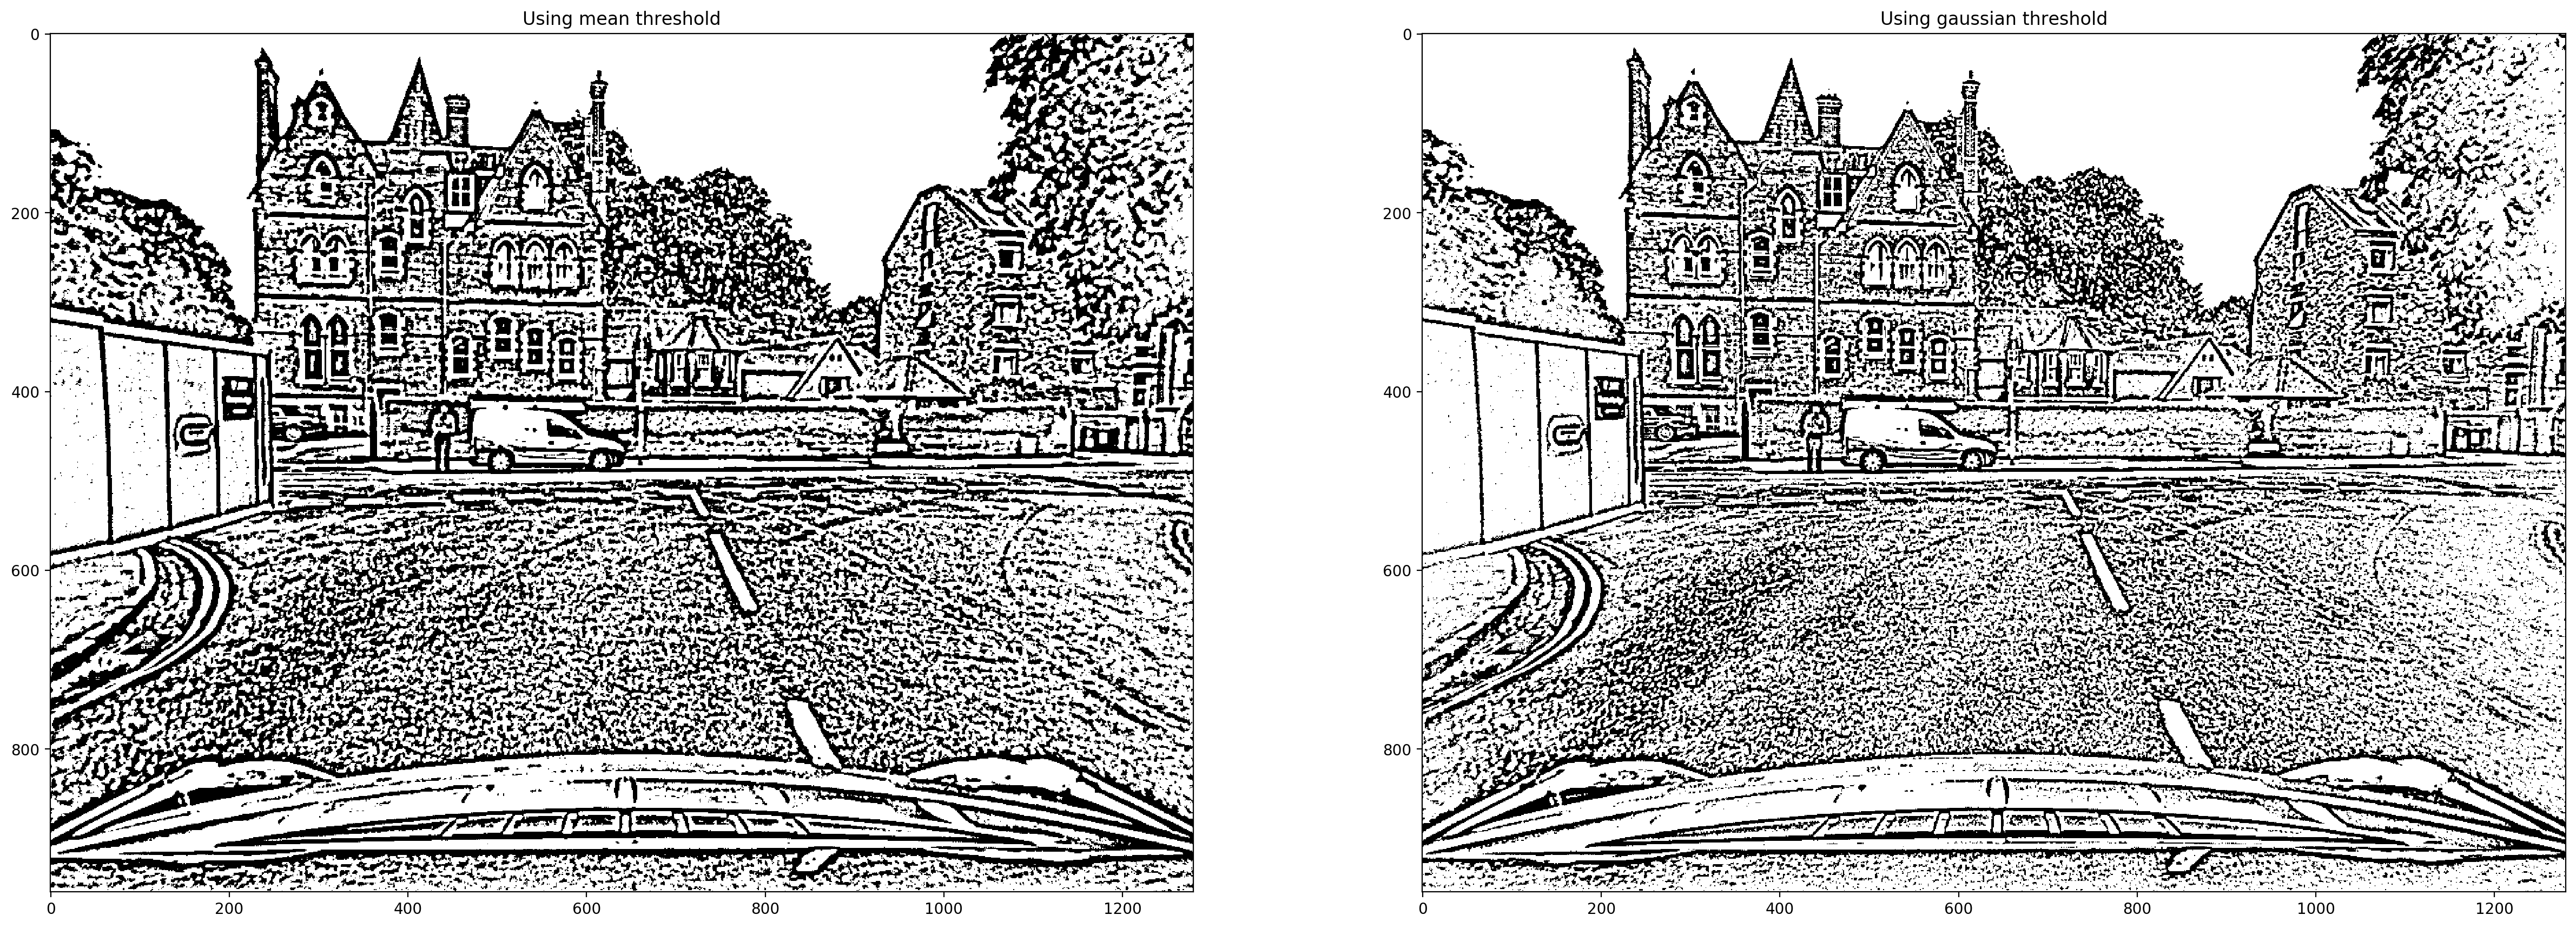

In [10]:
# Reliable lane markings
import cv2
from tqdm import tqdm
from random import randrange
from matplotlib import pyplot as plt
print("Reliable Lane markings cell: ")

reliableMarkings = []
for im in tqdm(imageArray):
    
    
    # Feature extraction based off https://medium.com/@galen.ballew/opencv-lanedetection-419361364fc0
    # Only white lines are going to be looked out, so only one threshold is needed
    grayIm = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # White uses grayscale threshold
    
    mask_white = cv2.inRange(grayIm, 200, 255)  # Threshold bright values
    
    kernel_size = 5
    mask_white = cv2.GaussianBlur(mask_white,(kernel_size,kernel_size),0)
    
    # threshIm = cv2.adaptiveThreshold(grayIm,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    
    reliableMarkings.append(mask_white)
    # clear_output(True)
    
# Show of different thresholding methods
imageNum = randrange(0, len(imageArray))

curImage = imageArray[imageNum]
curImage = cv2.cvtColor(curImage, cv2.COLOR_BGR2GRAY)  # Convert the image to gray

meanThresh = cv2.adaptiveThreshold(curImage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
meanThresh = cv2.cvtColor(meanThresh, cv2.COLOR_GRAY2RGB)

gausThresh = cv2.adaptiveThreshold(curImage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
gausThresh = cv2.cvtColor(gausThresh, cv2.COLOR_GRAY2RGB)

plt.figure(num=None, figsize=(30, 40), dpi=200)
plt.subplot(121)
plt.imshow(meanThresh)
plt.title("Using mean threshold")

plt.subplot(122)
plt.imshow(gausThresh)
plt.title("Using gaussian threshold")
plt.show()

print(''.join(['-' for i in range(50)]))

In [11]:
# Show of all the processing types
import cv2
from matplotlib import pyplot as plt
from IPython.display import clear_output

fig = plt.figure()
ims = []
for img, reliable in tqdm(zip(imageArray, reliableMarkings)):
    
    cv2.imshow("Original", cv2.resize(img, None, fx=0.5, fy=0.5))
    cv2.imshow("Reliable markings", cv2.resize(reliable, None, fx=0.5, fy=0.5))
    cv2.waitKey(100)
    clear_output(True)

print(''.join(['-' for i in range(50)]))




88it [00:09,  9.65it/s]


--------------------------------------------------


<Figure size 432x288 with 0 Axes>